# CS 4820
# Tutorial 2: Activation Functions and the Perceptron

### 1. Activation functions

#### 1.1. Sigmoid

Equation:
$f(X) = \frac{1}{1 + e^{-X}}$

Programmatically:

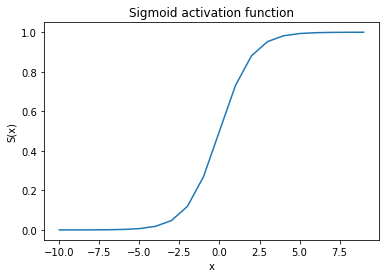

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, array, append

# Sigmoid activation function
def Sigmoid(x):
    return 1 / (1 + exp(-x))
  
# Graphical representation of our Sigmoid activation function
x = np.array(range(-10, 10),"float32");
plt.plot(x, Sigmoid(x));
plt.title("Sigmoid activation function");
plt.xlabel("x");
plt.ylabel("S(x)");

Keras built-in:

> Tip: make sure the type of the array `x` above is "float32" in order for TensorFlow to work on some CPUs/GPUs.

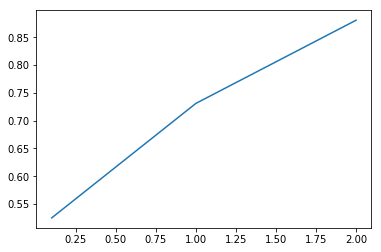

In [27]:
from tensorflow.keras.activations import sigmoid

plt.plot(x,sigmoid(x));

#### 1.2. Hyperbolic Tengent (TenH)

Equation:

$f(X) = \frac{2}{1 + e^{-2X}}-1$

Programmatically:

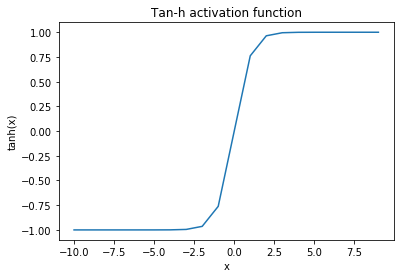

In [14]:
def Tanh(x):
    return 2 / (1 + exp(-2*x)) - 1
  
# Graphical representation of our tan-h activation function
plt.plot(x, Tanh(x));
plt.title("Tan-h activation function");
plt.xlabel("x");
plt.ylabel("tanh(x)");

Keras built-in:

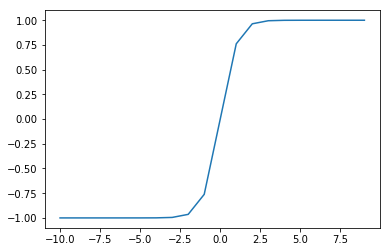

In [16]:
from tensorflow.keras.activations import tanh
plt.plot(x,tanh(x));

#### 1.3. Rectified linear units (ReLU)

Equation:

$f(X) = max(0,X)$

Programmatically:

Text(0, 0.5, 'ReLU(x)')

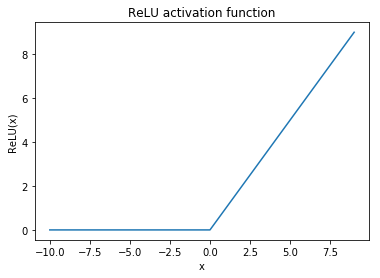

In [17]:
# ReLU activation function
def ReLU(x):
    return x * (x > 0)
  
# Graphical representation of our ReLU activation function
plt.plot(x, ReLU(x))
plt.title("ReLU activation function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")

Keras built-in:

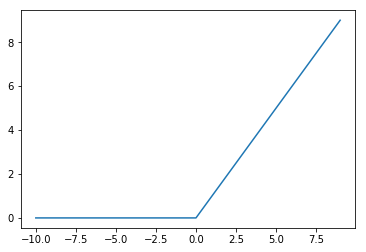

In [18]:
from tensorflow.keras.activations import relu
plt.plot(x,relu(x));

#### 1.4. Softmax

Equation:

$f(X) = \frac{e^j}{\sum_i{e^i}}$

Programmatically:

In [20]:
from numpy import sum

# Softmax activation function
def Softmax(x):
    return exp(x) / sum(exp(x))
  
#x = np.array([1, 2, 3, 4, 5], "float32")
x = np.array([2, 1, 0.1], "float32")

Softmax(x)

array([0.6590011 , 0.24243295, 0.09856589], dtype=float32)

Keras built-in:

In [81]:
from tensorflow.keras.layers import Activation

x=x.reshape(1,-1) # Has to reshape x from 1D to 2D due to the requirement from softmax
Activation('softmax')(x)

<tf.Tensor: id=281, shape=(1, 5), dtype=float32, numpy=
array([[0.01165623, 0.03168492, 0.08612854, 0.23412165, 0.6364086 ]],
      dtype=float32)>

### 2. The Perceptron

Now let's build the simplest ANN with one and only one neuron (aka. the Perceptron) and teach it to learn **logical AND**. Since the primary goal here is to see how the perceptron works after being trained, we will delay the discussions on the training process (in particular, the `model.compile()` and `model.fit()` statements) to classes later.

One thing to notice is that instead of using the "step" activation function as seen in the slides, we will use `sigmoid`.

> Step function is not one of the built-in activations functions in the TensorFlow backend. It is out of the scope of this course to integrate a customized activation function in our ANN-based model.

In [26]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# the four different states of the logical AND operation
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

print(training_data)

# the four expected results in the same order
target_data = np.array([[0],[0],[0],[1]], "float32")

print(target_data)

model = Sequential()

model.add(Dense(1, input_dim=2, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(training_data, target_data, epochs=2000, verbose=2, batch_size=4)

print(model.layers[0].get_weights())

print(model.predict(training_data))


[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
[[0.]
 [0.]
 [0.]
 [1.]]
Epoch 1/2000
4/4 - 0s - loss: 0.2848 - binary_accuracy: 0.7500
Epoch 2/2000
4/4 - 0s - loss: 0.2845 - binary_accuracy: 0.7500
Epoch 3/2000
4/4 - 0s - loss: 0.2843 - binary_accuracy: 0.7500
Epoch 4/2000
4/4 - 0s - loss: 0.2840 - binary_accuracy: 0.7500
Epoch 5/2000
4/4 - 0s - loss: 0.2838 - binary_accuracy: 0.7500
Epoch 6/2000
4/4 - 0s - loss: 0.2835 - binary_accuracy: 0.7500
Epoch 7/2000
4/4 - 0s - loss: 0.2833 - binary_accuracy: 0.7500
Epoch 8/2000
4/4 - 0s - loss: 0.2830 - binary_accuracy: 0.7500
Epoch 9/2000
4/4 - 0s - loss: 0.2828 - binary_accuracy: 0.7500
Epoch 10/2000
4/4 - 0s - loss: 0.2826 - binary_accuracy: 0.7500
Epoch 11/2000
4/4 - 0s - loss: 0.2823 - binary_accuracy: 0.7500
Epoch 12/2000
4/4 - 0s - loss: 0.2821 - binary_accuracy: 0.7500
Epoch 13/2000
4/4 - 0s - loss: 0.2818 - binary_accuracy: 0.7500
Epoch 14/2000
4/4 - 0s - loss: 0.2816 - binary_accuracy: 0.7500
Epoch 15/2000
4/4 - 0s - loss: 0.2813 - binary_accu

Epoch 128/2000
4/4 - 0s - loss: 0.2571 - binary_accuracy: 0.7500
Epoch 129/2000
4/4 - 0s - loss: 0.2569 - binary_accuracy: 0.7500
Epoch 130/2000
4/4 - 0s - loss: 0.2567 - binary_accuracy: 0.7500
Epoch 131/2000
4/4 - 0s - loss: 0.2565 - binary_accuracy: 0.7500
Epoch 132/2000
4/4 - 0s - loss: 0.2563 - binary_accuracy: 0.7500
Epoch 133/2000
4/4 - 0s - loss: 0.2562 - binary_accuracy: 0.7500
Epoch 134/2000
4/4 - 0s - loss: 0.2560 - binary_accuracy: 0.7500
Epoch 135/2000
4/4 - 0s - loss: 0.2558 - binary_accuracy: 0.7500
Epoch 136/2000
4/4 - 0s - loss: 0.2556 - binary_accuracy: 0.7500
Epoch 137/2000
4/4 - 0s - loss: 0.2554 - binary_accuracy: 0.7500
Epoch 138/2000
4/4 - 0s - loss: 0.2553 - binary_accuracy: 0.7500
Epoch 139/2000
4/4 - 0s - loss: 0.2551 - binary_accuracy: 0.7500
Epoch 140/2000
4/4 - 0s - loss: 0.2549 - binary_accuracy: 0.7500
Epoch 141/2000
4/4 - 0s - loss: 0.2547 - binary_accuracy: 0.7500
Epoch 142/2000
4/4 - 0s - loss: 0.2545 - binary_accuracy: 0.7500
Epoch 143/2000
4/4 - 0s -

Epoch 255/2000
4/4 - 0s - loss: 0.2368 - binary_accuracy: 0.7500
Epoch 256/2000
4/4 - 0s - loss: 0.2367 - binary_accuracy: 0.7500
Epoch 257/2000
4/4 - 0s - loss: 0.2366 - binary_accuracy: 0.7500
Epoch 258/2000
4/4 - 0s - loss: 0.2364 - binary_accuracy: 0.7500
Epoch 259/2000
4/4 - 0s - loss: 0.2363 - binary_accuracy: 0.7500
Epoch 260/2000
4/4 - 0s - loss: 0.2362 - binary_accuracy: 0.7500
Epoch 261/2000
4/4 - 0s - loss: 0.2360 - binary_accuracy: 0.7500
Epoch 262/2000
4/4 - 0s - loss: 0.2359 - binary_accuracy: 0.7500
Epoch 263/2000
4/4 - 0s - loss: 0.2357 - binary_accuracy: 0.7500
Epoch 264/2000
4/4 - 0s - loss: 0.2356 - binary_accuracy: 0.7500
Epoch 265/2000
4/4 - 0s - loss: 0.2355 - binary_accuracy: 0.7500
Epoch 266/2000
4/4 - 0s - loss: 0.2353 - binary_accuracy: 0.7500
Epoch 267/2000
4/4 - 0s - loss: 0.2352 - binary_accuracy: 0.7500
Epoch 268/2000
4/4 - 0s - loss: 0.2351 - binary_accuracy: 0.7500
Epoch 269/2000
4/4 - 0s - loss: 0.2349 - binary_accuracy: 0.7500
Epoch 270/2000
4/4 - 0s -

Epoch 382/2000
4/4 - 0s - loss: 0.2208 - binary_accuracy: 0.7500
Epoch 383/2000
4/4 - 0s - loss: 0.2207 - binary_accuracy: 0.7500
Epoch 384/2000
4/4 - 0s - loss: 0.2206 - binary_accuracy: 0.7500
Epoch 385/2000
4/4 - 0s - loss: 0.2204 - binary_accuracy: 0.7500
Epoch 386/2000
4/4 - 0s - loss: 0.2203 - binary_accuracy: 0.7500
Epoch 387/2000
4/4 - 0s - loss: 0.2202 - binary_accuracy: 0.7500
Epoch 388/2000
4/4 - 0s - loss: 0.2201 - binary_accuracy: 0.7500
Epoch 389/2000
4/4 - 0s - loss: 0.2200 - binary_accuracy: 0.7500
Epoch 390/2000
4/4 - 0s - loss: 0.2199 - binary_accuracy: 0.7500
Epoch 391/2000
4/4 - 0s - loss: 0.2197 - binary_accuracy: 0.7500
Epoch 392/2000
4/4 - 0s - loss: 0.2196 - binary_accuracy: 0.7500
Epoch 393/2000
4/4 - 0s - loss: 0.2195 - binary_accuracy: 0.7500
Epoch 394/2000
4/4 - 0s - loss: 0.2194 - binary_accuracy: 0.7500
Epoch 395/2000
4/4 - 0s - loss: 0.2193 - binary_accuracy: 0.7500
Epoch 396/2000
4/4 - 0s - loss: 0.2192 - binary_accuracy: 0.7500
Epoch 397/2000
4/4 - 0s -

Epoch 508/2000
4/4 - 0s - loss: 0.2066 - binary_accuracy: 0.7500
Epoch 509/2000
4/4 - 0s - loss: 0.2065 - binary_accuracy: 0.7500
Epoch 510/2000
4/4 - 0s - loss: 0.2064 - binary_accuracy: 0.7500
Epoch 511/2000
4/4 - 0s - loss: 0.2063 - binary_accuracy: 0.7500
Epoch 512/2000
4/4 - 0s - loss: 0.2061 - binary_accuracy: 0.7500
Epoch 513/2000
4/4 - 0s - loss: 0.2060 - binary_accuracy: 0.7500
Epoch 514/2000
4/4 - 0s - loss: 0.2059 - binary_accuracy: 0.7500
Epoch 515/2000
4/4 - 0s - loss: 0.2058 - binary_accuracy: 0.7500
Epoch 516/2000
4/4 - 0s - loss: 0.2057 - binary_accuracy: 0.7500
Epoch 517/2000
4/4 - 0s - loss: 0.2056 - binary_accuracy: 0.7500
Epoch 518/2000
4/4 - 0s - loss: 0.2055 - binary_accuracy: 0.7500
Epoch 519/2000
4/4 - 0s - loss: 0.2054 - binary_accuracy: 0.7500
Epoch 520/2000
4/4 - 0s - loss: 0.2053 - binary_accuracy: 0.7500
Epoch 521/2000
4/4 - 0s - loss: 0.2052 - binary_accuracy: 0.7500
Epoch 522/2000
4/4 - 0s - loss: 0.2051 - binary_accuracy: 0.7500
Epoch 523/2000
4/4 - 0s -

4/4 - 0s - loss: 0.1937 - binary_accuracy: 0.7500
Epoch 635/2000
4/4 - 0s - loss: 0.1936 - binary_accuracy: 0.7500
Epoch 636/2000
4/4 - 0s - loss: 0.1935 - binary_accuracy: 0.7500
Epoch 637/2000
4/4 - 0s - loss: 0.1934 - binary_accuracy: 0.7500
Epoch 638/2000
4/4 - 0s - loss: 0.1933 - binary_accuracy: 0.7500
Epoch 639/2000
4/4 - 0s - loss: 0.1932 - binary_accuracy: 0.7500
Epoch 640/2000
4/4 - 0s - loss: 0.1931 - binary_accuracy: 0.7500
Epoch 641/2000
4/4 - 0s - loss: 0.1930 - binary_accuracy: 0.7500
Epoch 642/2000
4/4 - 0s - loss: 0.1929 - binary_accuracy: 0.7500
Epoch 643/2000
4/4 - 0s - loss: 0.1928 - binary_accuracy: 0.7500
Epoch 644/2000
4/4 - 0s - loss: 0.1927 - binary_accuracy: 0.7500
Epoch 645/2000
4/4 - 0s - loss: 0.1926 - binary_accuracy: 0.7500
Epoch 646/2000
4/4 - 0s - loss: 0.1925 - binary_accuracy: 0.7500
Epoch 647/2000
4/4 - 0s - loss: 0.1924 - binary_accuracy: 0.7500
Epoch 648/2000
4/4 - 0s - loss: 0.1923 - binary_accuracy: 0.7500
Epoch 649/2000
4/4 - 0s - loss: 0.1922 -

Epoch 761/2000
4/4 - 0s - loss: 0.1821 - binary_accuracy: 0.7500
Epoch 762/2000
4/4 - 0s - loss: 0.1820 - binary_accuracy: 0.7500
Epoch 763/2000
4/4 - 0s - loss: 0.1819 - binary_accuracy: 0.7500
Epoch 764/2000
4/4 - 0s - loss: 0.1818 - binary_accuracy: 0.7500
Epoch 765/2000
4/4 - 0s - loss: 0.1817 - binary_accuracy: 0.7500
Epoch 766/2000
4/4 - 0s - loss: 0.1817 - binary_accuracy: 0.7500
Epoch 767/2000
4/4 - 0s - loss: 0.1816 - binary_accuracy: 0.7500
Epoch 768/2000
4/4 - 0s - loss: 0.1815 - binary_accuracy: 0.7500
Epoch 769/2000
4/4 - 0s - loss: 0.1814 - binary_accuracy: 0.7500
Epoch 770/2000
4/4 - 0s - loss: 0.1813 - binary_accuracy: 0.7500
Epoch 771/2000
4/4 - 0s - loss: 0.1812 - binary_accuracy: 0.7500
Epoch 772/2000
4/4 - 0s - loss: 0.1811 - binary_accuracy: 0.7500
Epoch 773/2000
4/4 - 0s - loss: 0.1811 - binary_accuracy: 0.7500
Epoch 774/2000
4/4 - 0s - loss: 0.1810 - binary_accuracy: 0.7500
Epoch 775/2000
4/4 - 0s - loss: 0.1809 - binary_accuracy: 0.7500
Epoch 776/2000
4/4 - 0s -

Epoch 888/2000
4/4 - 0s - loss: 0.1719 - binary_accuracy: 1.0000
Epoch 889/2000
4/4 - 0s - loss: 0.1719 - binary_accuracy: 1.0000
Epoch 890/2000
4/4 - 0s - loss: 0.1718 - binary_accuracy: 1.0000
Epoch 891/2000
4/4 - 0s - loss: 0.1717 - binary_accuracy: 1.0000
Epoch 892/2000
4/4 - 0s - loss: 0.1716 - binary_accuracy: 1.0000
Epoch 893/2000
4/4 - 0s - loss: 0.1716 - binary_accuracy: 1.0000
Epoch 894/2000
4/4 - 0s - loss: 0.1715 - binary_accuracy: 1.0000
Epoch 895/2000
4/4 - 0s - loss: 0.1714 - binary_accuracy: 1.0000
Epoch 896/2000
4/4 - 0s - loss: 0.1713 - binary_accuracy: 1.0000
Epoch 897/2000
4/4 - 0s - loss: 0.1713 - binary_accuracy: 1.0000
Epoch 898/2000
4/4 - 0s - loss: 0.1712 - binary_accuracy: 1.0000
Epoch 899/2000
4/4 - 0s - loss: 0.1711 - binary_accuracy: 1.0000
Epoch 900/2000
4/4 - 0s - loss: 0.1710 - binary_accuracy: 1.0000
Epoch 901/2000
4/4 - 0s - loss: 0.1710 - binary_accuracy: 1.0000
Epoch 902/2000
4/4 - 0s - loss: 0.1709 - binary_accuracy: 1.0000
Epoch 903/2000
4/4 - 0s -

Epoch 1014/2000
4/4 - 0s - loss: 0.1630 - binary_accuracy: 1.0000
Epoch 1015/2000
4/4 - 0s - loss: 0.1630 - binary_accuracy: 1.0000
Epoch 1016/2000
4/4 - 0s - loss: 0.1629 - binary_accuracy: 1.0000
Epoch 1017/2000
4/4 - 0s - loss: 0.1629 - binary_accuracy: 1.0000
Epoch 1018/2000
4/4 - 0s - loss: 0.1628 - binary_accuracy: 1.0000
Epoch 1019/2000
4/4 - 0s - loss: 0.1627 - binary_accuracy: 1.0000
Epoch 1020/2000
4/4 - 0s - loss: 0.1627 - binary_accuracy: 1.0000
Epoch 1021/2000
4/4 - 0s - loss: 0.1626 - binary_accuracy: 1.0000
Epoch 1022/2000
4/4 - 0s - loss: 0.1625 - binary_accuracy: 1.0000
Epoch 1023/2000
4/4 - 0s - loss: 0.1625 - binary_accuracy: 1.0000
Epoch 1024/2000
4/4 - 0s - loss: 0.1624 - binary_accuracy: 1.0000
Epoch 1025/2000
4/4 - 0s - loss: 0.1623 - binary_accuracy: 1.0000
Epoch 1026/2000
4/4 - 0s - loss: 0.1623 - binary_accuracy: 1.0000
Epoch 1027/2000
4/4 - 0s - loss: 0.1622 - binary_accuracy: 1.0000
Epoch 1028/2000
4/4 - 0s - loss: 0.1621 - binary_accuracy: 1.0000
Epoch 1029

Epoch 1139/2000
4/4 - 0s - loss: 0.1552 - binary_accuracy: 1.0000
Epoch 1140/2000
4/4 - 0s - loss: 0.1551 - binary_accuracy: 1.0000
Epoch 1141/2000
4/4 - 0s - loss: 0.1550 - binary_accuracy: 1.0000
Epoch 1142/2000
4/4 - 0s - loss: 0.1550 - binary_accuracy: 1.0000
Epoch 1143/2000
4/4 - 0s - loss: 0.1549 - binary_accuracy: 1.0000
Epoch 1144/2000
4/4 - 0s - loss: 0.1549 - binary_accuracy: 1.0000
Epoch 1145/2000
4/4 - 0s - loss: 0.1548 - binary_accuracy: 1.0000
Epoch 1146/2000
4/4 - 0s - loss: 0.1547 - binary_accuracy: 1.0000
Epoch 1147/2000
4/4 - 0s - loss: 0.1547 - binary_accuracy: 1.0000
Epoch 1148/2000
4/4 - 0s - loss: 0.1546 - binary_accuracy: 1.0000
Epoch 1149/2000
4/4 - 0s - loss: 0.1546 - binary_accuracy: 1.0000
Epoch 1150/2000
4/4 - 0s - loss: 0.1545 - binary_accuracy: 1.0000
Epoch 1151/2000
4/4 - 0s - loss: 0.1544 - binary_accuracy: 1.0000
Epoch 1152/2000
4/4 - 0s - loss: 0.1544 - binary_accuracy: 1.0000
Epoch 1153/2000
4/4 - 0s - loss: 0.1543 - binary_accuracy: 1.0000
Epoch 1154

Epoch 1264/2000
4/4 - 0s - loss: 0.1480 - binary_accuracy: 1.0000
Epoch 1265/2000
4/4 - 0s - loss: 0.1479 - binary_accuracy: 1.0000
Epoch 1266/2000
4/4 - 0s - loss: 0.1479 - binary_accuracy: 1.0000
Epoch 1267/2000
4/4 - 0s - loss: 0.1478 - binary_accuracy: 1.0000
Epoch 1268/2000
4/4 - 0s - loss: 0.1477 - binary_accuracy: 1.0000
Epoch 1269/2000
4/4 - 0s - loss: 0.1477 - binary_accuracy: 1.0000
Epoch 1270/2000
4/4 - 0s - loss: 0.1476 - binary_accuracy: 1.0000
Epoch 1271/2000
4/4 - 0s - loss: 0.1476 - binary_accuracy: 1.0000
Epoch 1272/2000
4/4 - 0s - loss: 0.1475 - binary_accuracy: 1.0000
Epoch 1273/2000
4/4 - 0s - loss: 0.1475 - binary_accuracy: 1.0000
Epoch 1274/2000
4/4 - 0s - loss: 0.1474 - binary_accuracy: 1.0000
Epoch 1275/2000
4/4 - 0s - loss: 0.1474 - binary_accuracy: 1.0000
Epoch 1276/2000
4/4 - 0s - loss: 0.1473 - binary_accuracy: 1.0000
Epoch 1277/2000
4/4 - 0s - loss: 0.1472 - binary_accuracy: 1.0000
Epoch 1278/2000
4/4 - 0s - loss: 0.1472 - binary_accuracy: 1.0000
Epoch 1279

Epoch 1389/2000
4/4 - 0s - loss: 0.1413 - binary_accuracy: 1.0000
Epoch 1390/2000
4/4 - 0s - loss: 0.1413 - binary_accuracy: 1.0000
Epoch 1391/2000
4/4 - 0s - loss: 0.1412 - binary_accuracy: 1.0000
Epoch 1392/2000
4/4 - 0s - loss: 0.1412 - binary_accuracy: 1.0000
Epoch 1393/2000
4/4 - 0s - loss: 0.1411 - binary_accuracy: 1.0000
Epoch 1394/2000
4/4 - 0s - loss: 0.1411 - binary_accuracy: 1.0000
Epoch 1395/2000
4/4 - 0s - loss: 0.1410 - binary_accuracy: 1.0000
Epoch 1396/2000
4/4 - 0s - loss: 0.1409 - binary_accuracy: 1.0000
Epoch 1397/2000
4/4 - 0s - loss: 0.1409 - binary_accuracy: 1.0000
Epoch 1398/2000
4/4 - 0s - loss: 0.1408 - binary_accuracy: 1.0000
Epoch 1399/2000
4/4 - 0s - loss: 0.1408 - binary_accuracy: 1.0000
Epoch 1400/2000
4/4 - 0s - loss: 0.1407 - binary_accuracy: 1.0000
Epoch 1401/2000
4/4 - 0s - loss: 0.1407 - binary_accuracy: 1.0000
Epoch 1402/2000
4/4 - 0s - loss: 0.1406 - binary_accuracy: 1.0000
Epoch 1403/2000
4/4 - 0s - loss: 0.1406 - binary_accuracy: 1.0000
Epoch 1404

Epoch 1514/2000
4/4 - 0s - loss: 0.1351 - binary_accuracy: 1.0000
Epoch 1515/2000
4/4 - 0s - loss: 0.1350 - binary_accuracy: 1.0000
Epoch 1516/2000
4/4 - 0s - loss: 0.1350 - binary_accuracy: 1.0000
Epoch 1517/2000
4/4 - 0s - loss: 0.1349 - binary_accuracy: 1.0000
Epoch 1518/2000
4/4 - 0s - loss: 0.1349 - binary_accuracy: 1.0000
Epoch 1519/2000
4/4 - 0s - loss: 0.1349 - binary_accuracy: 1.0000
Epoch 1520/2000
4/4 - 0s - loss: 0.1348 - binary_accuracy: 1.0000
Epoch 1521/2000
4/4 - 0s - loss: 0.1348 - binary_accuracy: 1.0000
Epoch 1522/2000
4/4 - 0s - loss: 0.1347 - binary_accuracy: 1.0000
Epoch 1523/2000
4/4 - 0s - loss: 0.1347 - binary_accuracy: 1.0000
Epoch 1524/2000
4/4 - 0s - loss: 0.1346 - binary_accuracy: 1.0000
Epoch 1525/2000
4/4 - 0s - loss: 0.1346 - binary_accuracy: 1.0000
Epoch 1526/2000
4/4 - 0s - loss: 0.1345 - binary_accuracy: 1.0000
Epoch 1527/2000
4/4 - 0s - loss: 0.1345 - binary_accuracy: 1.0000
Epoch 1528/2000
4/4 - 0s - loss: 0.1344 - binary_accuracy: 1.0000
Epoch 1529

Epoch 1639/2000
4/4 - 0s - loss: 0.1293 - binary_accuracy: 1.0000
Epoch 1640/2000
4/4 - 0s - loss: 0.1292 - binary_accuracy: 1.0000
Epoch 1641/2000
4/4 - 0s - loss: 0.1292 - binary_accuracy: 1.0000
Epoch 1642/2000
4/4 - 0s - loss: 0.1291 - binary_accuracy: 1.0000
Epoch 1643/2000
4/4 - 0s - loss: 0.1291 - binary_accuracy: 1.0000
Epoch 1644/2000
4/4 - 0s - loss: 0.1290 - binary_accuracy: 1.0000
Epoch 1645/2000
4/4 - 0s - loss: 0.1290 - binary_accuracy: 1.0000
Epoch 1646/2000
4/4 - 0s - loss: 0.1289 - binary_accuracy: 1.0000
Epoch 1647/2000
4/4 - 0s - loss: 0.1289 - binary_accuracy: 1.0000
Epoch 1648/2000
4/4 - 0s - loss: 0.1288 - binary_accuracy: 1.0000
Epoch 1649/2000
4/4 - 0s - loss: 0.1288 - binary_accuracy: 1.0000
Epoch 1650/2000
4/4 - 0s - loss: 0.1288 - binary_accuracy: 1.0000
Epoch 1651/2000
4/4 - 0s - loss: 0.1287 - binary_accuracy: 1.0000
Epoch 1652/2000
4/4 - 0s - loss: 0.1287 - binary_accuracy: 1.0000
Epoch 1653/2000
4/4 - 0s - loss: 0.1286 - binary_accuracy: 1.0000
Epoch 1654

Epoch 1764/2000
4/4 - 0s - loss: 0.1237 - binary_accuracy: 1.0000
Epoch 1765/2000
4/4 - 0s - loss: 0.1237 - binary_accuracy: 1.0000
Epoch 1766/2000
4/4 - 0s - loss: 0.1237 - binary_accuracy: 1.0000
Epoch 1767/2000
4/4 - 0s - loss: 0.1236 - binary_accuracy: 1.0000
Epoch 1768/2000
4/4 - 0s - loss: 0.1236 - binary_accuracy: 1.0000
Epoch 1769/2000
4/4 - 0s - loss: 0.1235 - binary_accuracy: 1.0000
Epoch 1770/2000
4/4 - 0s - loss: 0.1235 - binary_accuracy: 1.0000
Epoch 1771/2000
4/4 - 0s - loss: 0.1234 - binary_accuracy: 1.0000
Epoch 1772/2000
4/4 - 0s - loss: 0.1234 - binary_accuracy: 1.0000
Epoch 1773/2000
4/4 - 0s - loss: 0.1234 - binary_accuracy: 1.0000
Epoch 1774/2000
4/4 - 0s - loss: 0.1233 - binary_accuracy: 1.0000
Epoch 1775/2000
4/4 - 0s - loss: 0.1233 - binary_accuracy: 1.0000
Epoch 1776/2000
4/4 - 0s - loss: 0.1232 - binary_accuracy: 1.0000
Epoch 1777/2000
4/4 - 0s - loss: 0.1232 - binary_accuracy: 1.0000
Epoch 1778/2000
4/4 - 0s - loss: 0.1231 - binary_accuracy: 1.0000
Epoch 1779

Epoch 1889/2000
4/4 - 0s - loss: 0.1185 - binary_accuracy: 1.0000
Epoch 1890/2000
4/4 - 0s - loss: 0.1185 - binary_accuracy: 1.0000
Epoch 1891/2000
4/4 - 0s - loss: 0.1185 - binary_accuracy: 1.0000
Epoch 1892/2000
4/4 - 0s - loss: 0.1184 - binary_accuracy: 1.0000
Epoch 1893/2000
4/4 - 0s - loss: 0.1184 - binary_accuracy: 1.0000
Epoch 1894/2000
4/4 - 0s - loss: 0.1183 - binary_accuracy: 1.0000
Epoch 1895/2000
4/4 - 0s - loss: 0.1183 - binary_accuracy: 1.0000
Epoch 1896/2000
4/4 - 0s - loss: 0.1183 - binary_accuracy: 1.0000
Epoch 1897/2000
4/4 - 0s - loss: 0.1182 - binary_accuracy: 1.0000
Epoch 1898/2000
4/4 - 0s - loss: 0.1182 - binary_accuracy: 1.0000
Epoch 1899/2000
4/4 - 0s - loss: 0.1181 - binary_accuracy: 1.0000
Epoch 1900/2000
4/4 - 0s - loss: 0.1181 - binary_accuracy: 1.0000
Epoch 1901/2000
4/4 - 0s - loss: 0.1181 - binary_accuracy: 1.0000
Epoch 1902/2000
4/4 - 0s - loss: 0.1180 - binary_accuracy: 1.0000
Epoch 1903/2000
4/4 - 0s - loss: 0.1180 - binary_accuracy: 1.0000
Epoch 1904

You should see similar results when training the Perceptron to learn **logical OR**.

In [29]:
target_data = np.array([[0],[1],[1],[1]], "float32")

model.fit(training_data, target_data, epochs=2000, verbose=2, batch_size=4)

print(model.layers[0].get_weights())

print(model.predict(training_data))

Epoch 1/2000
4/4 - 0s - loss: 0.2484 - binary_accuracy: 0.5000
Epoch 2/2000
4/4 - 0s - loss: 0.2481 - binary_accuracy: 0.5000
Epoch 3/2000
4/4 - 0s - loss: 0.2476 - binary_accuracy: 0.5000
Epoch 4/2000
4/4 - 0s - loss: 0.2469 - binary_accuracy: 0.5000
Epoch 5/2000
4/4 - 0s - loss: 0.2460 - binary_accuracy: 0.5000
Epoch 6/2000
4/4 - 0s - loss: 0.2450 - binary_accuracy: 0.5000
Epoch 7/2000
4/4 - 0s - loss: 0.2439 - binary_accuracy: 0.5000
Epoch 8/2000
4/4 - 0s - loss: 0.2427 - binary_accuracy: 0.5000
Epoch 9/2000
4/4 - 0s - loss: 0.2415 - binary_accuracy: 0.5000
Epoch 10/2000
4/4 - 0s - loss: 0.2402 - binary_accuracy: 0.5000
Epoch 11/2000
4/4 - 0s - loss: 0.2388 - binary_accuracy: 0.5000
Epoch 12/2000
4/4 - 0s - loss: 0.2374 - binary_accuracy: 0.5000
Epoch 13/2000
4/4 - 0s - loss: 0.2360 - binary_accuracy: 0.5000
Epoch 14/2000
4/4 - 0s - loss: 0.2346 - binary_accuracy: 0.5000
Epoch 15/2000
4/4 - 0s - loss: 0.2331 - binary_accuracy: 0.5000
Epoch 16/2000
4/4 - 0s - loss: 0.2317 - binary_ac

Epoch 129/2000
4/4 - 0s - loss: 0.1353 - binary_accuracy: 1.0000
Epoch 130/2000
4/4 - 0s - loss: 0.1349 - binary_accuracy: 1.0000
Epoch 131/2000
4/4 - 0s - loss: 0.1344 - binary_accuracy: 1.0000
Epoch 132/2000
4/4 - 0s - loss: 0.1339 - binary_accuracy: 1.0000
Epoch 133/2000
4/4 - 0s - loss: 0.1335 - binary_accuracy: 1.0000
Epoch 134/2000
4/4 - 0s - loss: 0.1330 - binary_accuracy: 1.0000
Epoch 135/2000
4/4 - 0s - loss: 0.1326 - binary_accuracy: 1.0000
Epoch 136/2000
4/4 - 0s - loss: 0.1321 - binary_accuracy: 1.0000
Epoch 137/2000
4/4 - 0s - loss: 0.1317 - binary_accuracy: 1.0000
Epoch 138/2000
4/4 - 0s - loss: 0.1313 - binary_accuracy: 1.0000
Epoch 139/2000
4/4 - 0s - loss: 0.1308 - binary_accuracy: 1.0000
Epoch 140/2000
4/4 - 0s - loss: 0.1304 - binary_accuracy: 1.0000
Epoch 141/2000
4/4 - 0s - loss: 0.1300 - binary_accuracy: 1.0000
Epoch 142/2000
4/4 - 0s - loss: 0.1295 - binary_accuracy: 1.0000
Epoch 143/2000
4/4 - 0s - loss: 0.1291 - binary_accuracy: 1.0000
Epoch 144/2000
4/4 - 0s -

Epoch 256/2000
4/4 - 0s - loss: 0.0953 - binary_accuracy: 1.0000
Epoch 257/2000
4/4 - 0s - loss: 0.0951 - binary_accuracy: 1.0000
Epoch 258/2000
4/4 - 0s - loss: 0.0949 - binary_accuracy: 1.0000
Epoch 259/2000
4/4 - 0s - loss: 0.0946 - binary_accuracy: 1.0000
Epoch 260/2000
4/4 - 0s - loss: 0.0944 - binary_accuracy: 1.0000
Epoch 261/2000
4/4 - 0s - loss: 0.0942 - binary_accuracy: 1.0000
Epoch 262/2000
4/4 - 0s - loss: 0.0940 - binary_accuracy: 1.0000
Epoch 263/2000
4/4 - 0s - loss: 0.0938 - binary_accuracy: 1.0000
Epoch 264/2000
4/4 - 0s - loss: 0.0936 - binary_accuracy: 1.0000
Epoch 265/2000
4/4 - 0s - loss: 0.0934 - binary_accuracy: 1.0000
Epoch 266/2000
4/4 - 0s - loss: 0.0932 - binary_accuracy: 1.0000
Epoch 267/2000
4/4 - 0s - loss: 0.0930 - binary_accuracy: 1.0000
Epoch 268/2000
4/4 - 0s - loss: 0.0928 - binary_accuracy: 1.0000
Epoch 269/2000
4/4 - 0s - loss: 0.0926 - binary_accuracy: 1.0000
Epoch 270/2000
4/4 - 0s - loss: 0.0924 - binary_accuracy: 1.0000
Epoch 271/2000
4/4 - 0s -

Epoch 383/2000
4/4 - 0s - loss: 0.0751 - binary_accuracy: 1.0000
Epoch 384/2000
4/4 - 0s - loss: 0.0750 - binary_accuracy: 1.0000
Epoch 385/2000
4/4 - 0s - loss: 0.0749 - binary_accuracy: 1.0000
Epoch 386/2000
4/4 - 0s - loss: 0.0748 - binary_accuracy: 1.0000
Epoch 387/2000
4/4 - 0s - loss: 0.0747 - binary_accuracy: 1.0000
Epoch 388/2000
4/4 - 0s - loss: 0.0745 - binary_accuracy: 1.0000
Epoch 389/2000
4/4 - 0s - loss: 0.0744 - binary_accuracy: 1.0000
Epoch 390/2000
4/4 - 0s - loss: 0.0743 - binary_accuracy: 1.0000
Epoch 391/2000
4/4 - 0s - loss: 0.0742 - binary_accuracy: 1.0000
Epoch 392/2000
4/4 - 0s - loss: 0.0741 - binary_accuracy: 1.0000
Epoch 393/2000
4/4 - 0s - loss: 0.0740 - binary_accuracy: 1.0000
Epoch 394/2000
4/4 - 0s - loss: 0.0739 - binary_accuracy: 1.0000
Epoch 395/2000
4/4 - 0s - loss: 0.0737 - binary_accuracy: 1.0000
Epoch 396/2000
4/4 - 0s - loss: 0.0736 - binary_accuracy: 1.0000
Epoch 397/2000
4/4 - 0s - loss: 0.0735 - binary_accuracy: 1.0000
Epoch 398/2000
4/4 - 0s -

Epoch 510/2000
4/4 - 0s - loss: 0.0634 - binary_accuracy: 1.0000
Epoch 511/2000
4/4 - 0s - loss: 0.0633 - binary_accuracy: 1.0000
Epoch 512/2000
4/4 - 0s - loss: 0.0633 - binary_accuracy: 1.0000
Epoch 513/2000
4/4 - 0s - loss: 0.0632 - binary_accuracy: 1.0000
Epoch 514/2000
4/4 - 0s - loss: 0.0631 - binary_accuracy: 1.0000
Epoch 515/2000
4/4 - 0s - loss: 0.0630 - binary_accuracy: 1.0000
Epoch 516/2000
4/4 - 0s - loss: 0.0630 - binary_accuracy: 1.0000
Epoch 517/2000
4/4 - 0s - loss: 0.0629 - binary_accuracy: 1.0000
Epoch 518/2000
4/4 - 0s - loss: 0.0628 - binary_accuracy: 1.0000
Epoch 519/2000
4/4 - 0s - loss: 0.0628 - binary_accuracy: 1.0000
Epoch 520/2000
4/4 - 0s - loss: 0.0627 - binary_accuracy: 1.0000
Epoch 521/2000
4/4 - 0s - loss: 0.0626 - binary_accuracy: 1.0000
Epoch 522/2000
4/4 - 0s - loss: 0.0626 - binary_accuracy: 1.0000
Epoch 523/2000
4/4 - 0s - loss: 0.0625 - binary_accuracy: 1.0000
Epoch 524/2000
4/4 - 0s - loss: 0.0624 - binary_accuracy: 1.0000
Epoch 525/2000
4/4 - 0s -

Epoch 637/2000
4/4 - 0s - loss: 0.0560 - binary_accuracy: 1.0000
Epoch 638/2000
4/4 - 0s - loss: 0.0559 - binary_accuracy: 1.0000
Epoch 639/2000
4/4 - 0s - loss: 0.0559 - binary_accuracy: 1.0000
Epoch 640/2000
4/4 - 0s - loss: 0.0558 - binary_accuracy: 1.0000
Epoch 641/2000
4/4 - 0s - loss: 0.0558 - binary_accuracy: 1.0000
Epoch 642/2000
4/4 - 0s - loss: 0.0557 - binary_accuracy: 1.0000
Epoch 643/2000
4/4 - 0s - loss: 0.0557 - binary_accuracy: 1.0000
Epoch 644/2000
4/4 - 0s - loss: 0.0556 - binary_accuracy: 1.0000
Epoch 645/2000
4/4 - 0s - loss: 0.0556 - binary_accuracy: 1.0000
Epoch 646/2000
4/4 - 0s - loss: 0.0555 - binary_accuracy: 1.0000
Epoch 647/2000
4/4 - 0s - loss: 0.0555 - binary_accuracy: 1.0000
Epoch 648/2000
4/4 - 0s - loss: 0.0554 - binary_accuracy: 1.0000
Epoch 649/2000
4/4 - 0s - loss: 0.0554 - binary_accuracy: 1.0000
Epoch 650/2000
4/4 - 0s - loss: 0.0553 - binary_accuracy: 1.0000
Epoch 651/2000
4/4 - 0s - loss: 0.0553 - binary_accuracy: 1.0000
Epoch 652/2000
4/4 - 0s -

Epoch 764/2000
4/4 - 0s - loss: 0.0509 - binary_accuracy: 1.0000
Epoch 765/2000
4/4 - 0s - loss: 0.0508 - binary_accuracy: 1.0000
Epoch 766/2000
4/4 - 0s - loss: 0.0508 - binary_accuracy: 1.0000
Epoch 767/2000
4/4 - 0s - loss: 0.0508 - binary_accuracy: 1.0000
Epoch 768/2000
4/4 - 0s - loss: 0.0507 - binary_accuracy: 1.0000
Epoch 769/2000
4/4 - 0s - loss: 0.0507 - binary_accuracy: 1.0000
Epoch 770/2000
4/4 - 0s - loss: 0.0507 - binary_accuracy: 1.0000
Epoch 771/2000
4/4 - 0s - loss: 0.0506 - binary_accuracy: 1.0000
Epoch 772/2000
4/4 - 0s - loss: 0.0506 - binary_accuracy: 1.0000
Epoch 773/2000
4/4 - 0s - loss: 0.0506 - binary_accuracy: 1.0000
Epoch 774/2000
4/4 - 0s - loss: 0.0506 - binary_accuracy: 1.0000
Epoch 775/2000
4/4 - 0s - loss: 0.0505 - binary_accuracy: 1.0000
Epoch 776/2000
4/4 - 0s - loss: 0.0505 - binary_accuracy: 1.0000
Epoch 777/2000
4/4 - 0s - loss: 0.0505 - binary_accuracy: 1.0000
Epoch 778/2000
4/4 - 0s - loss: 0.0504 - binary_accuracy: 1.0000
Epoch 779/2000
4/4 - 0s -

Epoch 891/2000
4/4 - 0s - loss: 0.0472 - binary_accuracy: 1.0000
Epoch 892/2000
4/4 - 0s - loss: 0.0472 - binary_accuracy: 1.0000
Epoch 893/2000
4/4 - 0s - loss: 0.0472 - binary_accuracy: 1.0000
Epoch 894/2000
4/4 - 0s - loss: 0.0471 - binary_accuracy: 1.0000
Epoch 895/2000
4/4 - 0s - loss: 0.0471 - binary_accuracy: 1.0000
Epoch 896/2000
4/4 - 0s - loss: 0.0471 - binary_accuracy: 1.0000
Epoch 897/2000
4/4 - 0s - loss: 0.0471 - binary_accuracy: 1.0000
Epoch 898/2000
4/4 - 0s - loss: 0.0470 - binary_accuracy: 1.0000
Epoch 899/2000
4/4 - 0s - loss: 0.0470 - binary_accuracy: 1.0000
Epoch 900/2000
4/4 - 0s - loss: 0.0470 - binary_accuracy: 1.0000
Epoch 901/2000
4/4 - 0s - loss: 0.0470 - binary_accuracy: 1.0000
Epoch 902/2000
4/4 - 0s - loss: 0.0469 - binary_accuracy: 1.0000
Epoch 903/2000
4/4 - 0s - loss: 0.0469 - binary_accuracy: 1.0000
Epoch 904/2000
4/4 - 0s - loss: 0.0469 - binary_accuracy: 1.0000
Epoch 905/2000
4/4 - 0s - loss: 0.0469 - binary_accuracy: 1.0000
Epoch 906/2000
4/4 - 0s -

Epoch 1017/2000
4/4 - 0s - loss: 0.0444 - binary_accuracy: 1.0000
Epoch 1018/2000
4/4 - 0s - loss: 0.0444 - binary_accuracy: 1.0000
Epoch 1019/2000
4/4 - 0s - loss: 0.0444 - binary_accuracy: 1.0000
Epoch 1020/2000
4/4 - 0s - loss: 0.0444 - binary_accuracy: 1.0000
Epoch 1021/2000
4/4 - 0s - loss: 0.0443 - binary_accuracy: 1.0000
Epoch 1022/2000
4/4 - 0s - loss: 0.0443 - binary_accuracy: 1.0000
Epoch 1023/2000
4/4 - 0s - loss: 0.0443 - binary_accuracy: 1.0000
Epoch 1024/2000
4/4 - 0s - loss: 0.0443 - binary_accuracy: 1.0000
Epoch 1025/2000
4/4 - 0s - loss: 0.0443 - binary_accuracy: 1.0000
Epoch 1026/2000
4/4 - 0s - loss: 0.0442 - binary_accuracy: 1.0000
Epoch 1027/2000
4/4 - 0s - loss: 0.0442 - binary_accuracy: 1.0000
Epoch 1028/2000
4/4 - 0s - loss: 0.0442 - binary_accuracy: 1.0000
Epoch 1029/2000
4/4 - 0s - loss: 0.0442 - binary_accuracy: 1.0000
Epoch 1030/2000
4/4 - 0s - loss: 0.0442 - binary_accuracy: 1.0000
Epoch 1031/2000
4/4 - 0s - loss: 0.0441 - binary_accuracy: 1.0000
Epoch 1032

Epoch 1142/2000
4/4 - 0s - loss: 0.0422 - binary_accuracy: 1.0000
Epoch 1143/2000
4/4 - 0s - loss: 0.0421 - binary_accuracy: 1.0000
Epoch 1144/2000
4/4 - 0s - loss: 0.0421 - binary_accuracy: 1.0000
Epoch 1145/2000
4/4 - 0s - loss: 0.0421 - binary_accuracy: 1.0000
Epoch 1146/2000
4/4 - 0s - loss: 0.0421 - binary_accuracy: 1.0000
Epoch 1147/2000
4/4 - 0s - loss: 0.0421 - binary_accuracy: 1.0000
Epoch 1148/2000
4/4 - 0s - loss: 0.0421 - binary_accuracy: 1.0000
Epoch 1149/2000
4/4 - 0s - loss: 0.0420 - binary_accuracy: 1.0000
Epoch 1150/2000
4/4 - 0s - loss: 0.0420 - binary_accuracy: 1.0000
Epoch 1151/2000
4/4 - 0s - loss: 0.0420 - binary_accuracy: 1.0000
Epoch 1152/2000
4/4 - 0s - loss: 0.0420 - binary_accuracy: 1.0000
Epoch 1153/2000
4/4 - 0s - loss: 0.0420 - binary_accuracy: 1.0000
Epoch 1154/2000
4/4 - 0s - loss: 0.0420 - binary_accuracy: 1.0000
Epoch 1155/2000
4/4 - 0s - loss: 0.0420 - binary_accuracy: 1.0000
Epoch 1156/2000
4/4 - 0s - loss: 0.0419 - binary_accuracy: 1.0000
Epoch 1157

Epoch 1267/2000
4/4 - 0s - loss: 0.0402 - binary_accuracy: 1.0000
Epoch 1268/2000
4/4 - 0s - loss: 0.0402 - binary_accuracy: 1.0000
Epoch 1269/2000
4/4 - 0s - loss: 0.0402 - binary_accuracy: 1.0000
Epoch 1270/2000
4/4 - 0s - loss: 0.0402 - binary_accuracy: 1.0000
Epoch 1271/2000
4/4 - 0s - loss: 0.0402 - binary_accuracy: 1.0000
Epoch 1272/2000
4/4 - 0s - loss: 0.0402 - binary_accuracy: 1.0000
Epoch 1273/2000
4/4 - 0s - loss: 0.0402 - binary_accuracy: 1.0000
Epoch 1274/2000
4/4 - 0s - loss: 0.0401 - binary_accuracy: 1.0000
Epoch 1275/2000
4/4 - 0s - loss: 0.0401 - binary_accuracy: 1.0000
Epoch 1276/2000
4/4 - 0s - loss: 0.0401 - binary_accuracy: 1.0000
Epoch 1277/2000
4/4 - 0s - loss: 0.0401 - binary_accuracy: 1.0000
Epoch 1278/2000
4/4 - 0s - loss: 0.0401 - binary_accuracy: 1.0000
Epoch 1279/2000
4/4 - 0s - loss: 0.0401 - binary_accuracy: 1.0000
Epoch 1280/2000
4/4 - 0s - loss: 0.0401 - binary_accuracy: 1.0000
Epoch 1281/2000
4/4 - 0s - loss: 0.0400 - binary_accuracy: 1.0000
Epoch 1282

Epoch 1392/2000
4/4 - 0s - loss: 0.0385 - binary_accuracy: 1.0000
Epoch 1393/2000
4/4 - 0s - loss: 0.0385 - binary_accuracy: 1.0000
Epoch 1394/2000
4/4 - 0s - loss: 0.0385 - binary_accuracy: 1.0000
Epoch 1395/2000
4/4 - 0s - loss: 0.0385 - binary_accuracy: 1.0000
Epoch 1396/2000
4/4 - 0s - loss: 0.0385 - binary_accuracy: 1.0000
Epoch 1397/2000
4/4 - 0s - loss: 0.0385 - binary_accuracy: 1.0000
Epoch 1398/2000
4/4 - 0s - loss: 0.0385 - binary_accuracy: 1.0000
Epoch 1399/2000
4/4 - 0s - loss: 0.0384 - binary_accuracy: 1.0000
Epoch 1400/2000
4/4 - 0s - loss: 0.0384 - binary_accuracy: 1.0000
Epoch 1401/2000
4/4 - 0s - loss: 0.0384 - binary_accuracy: 1.0000
Epoch 1402/2000
4/4 - 0s - loss: 0.0384 - binary_accuracy: 1.0000
Epoch 1403/2000
4/4 - 0s - loss: 0.0384 - binary_accuracy: 1.0000
Epoch 1404/2000
4/4 - 0s - loss: 0.0384 - binary_accuracy: 1.0000
Epoch 1405/2000
4/4 - 0s - loss: 0.0384 - binary_accuracy: 1.0000
Epoch 1406/2000
4/4 - 0s - loss: 0.0384 - binary_accuracy: 1.0000
Epoch 1407

Epoch 1517/2000
4/4 - 0s - loss: 0.0370 - binary_accuracy: 1.0000
Epoch 1518/2000
4/4 - 0s - loss: 0.0370 - binary_accuracy: 1.0000
Epoch 1519/2000
4/4 - 0s - loss: 0.0369 - binary_accuracy: 1.0000
Epoch 1520/2000
4/4 - 0s - loss: 0.0369 - binary_accuracy: 1.0000
Epoch 1521/2000
4/4 - 0s - loss: 0.0369 - binary_accuracy: 1.0000
Epoch 1522/2000
4/4 - 0s - loss: 0.0369 - binary_accuracy: 1.0000
Epoch 1523/2000
4/4 - 0s - loss: 0.0369 - binary_accuracy: 1.0000
Epoch 1524/2000
4/4 - 0s - loss: 0.0369 - binary_accuracy: 1.0000
Epoch 1525/2000
4/4 - 0s - loss: 0.0369 - binary_accuracy: 1.0000
Epoch 1526/2000
4/4 - 0s - loss: 0.0369 - binary_accuracy: 1.0000
Epoch 1527/2000
4/4 - 0s - loss: 0.0368 - binary_accuracy: 1.0000
Epoch 1528/2000
4/4 - 0s - loss: 0.0368 - binary_accuracy: 1.0000
Epoch 1529/2000
4/4 - 0s - loss: 0.0368 - binary_accuracy: 1.0000
Epoch 1530/2000
4/4 - 0s - loss: 0.0368 - binary_accuracy: 1.0000
Epoch 1531/2000
4/4 - 0s - loss: 0.0368 - binary_accuracy: 1.0000
Epoch 1532

Epoch 1642/2000
4/4 - 0s - loss: 0.0355 - binary_accuracy: 1.0000
Epoch 1643/2000
4/4 - 0s - loss: 0.0355 - binary_accuracy: 1.0000
Epoch 1644/2000
4/4 - 0s - loss: 0.0355 - binary_accuracy: 1.0000
Epoch 1645/2000
4/4 - 0s - loss: 0.0355 - binary_accuracy: 1.0000
Epoch 1646/2000
4/4 - 0s - loss: 0.0354 - binary_accuracy: 1.0000
Epoch 1647/2000
4/4 - 0s - loss: 0.0354 - binary_accuracy: 1.0000
Epoch 1648/2000
4/4 - 0s - loss: 0.0354 - binary_accuracy: 1.0000
Epoch 1649/2000
4/4 - 0s - loss: 0.0354 - binary_accuracy: 1.0000
Epoch 1650/2000
4/4 - 0s - loss: 0.0354 - binary_accuracy: 1.0000
Epoch 1651/2000
4/4 - 0s - loss: 0.0354 - binary_accuracy: 1.0000
Epoch 1652/2000
4/4 - 0s - loss: 0.0354 - binary_accuracy: 1.0000
Epoch 1653/2000
4/4 - 0s - loss: 0.0354 - binary_accuracy: 1.0000
Epoch 1654/2000
4/4 - 0s - loss: 0.0354 - binary_accuracy: 1.0000
Epoch 1655/2000
4/4 - 0s - loss: 0.0353 - binary_accuracy: 1.0000
Epoch 1656/2000
4/4 - 0s - loss: 0.0353 - binary_accuracy: 1.0000
Epoch 1657

Epoch 1767/2000
4/4 - 0s - loss: 0.0341 - binary_accuracy: 1.0000
Epoch 1768/2000
4/4 - 0s - loss: 0.0341 - binary_accuracy: 1.0000
Epoch 1769/2000
4/4 - 0s - loss: 0.0341 - binary_accuracy: 1.0000
Epoch 1770/2000
4/4 - 0s - loss: 0.0340 - binary_accuracy: 1.0000
Epoch 1771/2000
4/4 - 0s - loss: 0.0340 - binary_accuracy: 1.0000
Epoch 1772/2000
4/4 - 0s - loss: 0.0340 - binary_accuracy: 1.0000
Epoch 1773/2000
4/4 - 0s - loss: 0.0340 - binary_accuracy: 1.0000
Epoch 1774/2000
4/4 - 0s - loss: 0.0340 - binary_accuracy: 1.0000
Epoch 1775/2000
4/4 - 0s - loss: 0.0340 - binary_accuracy: 1.0000
Epoch 1776/2000
4/4 - 0s - loss: 0.0340 - binary_accuracy: 1.0000
Epoch 1777/2000
4/4 - 0s - loss: 0.0340 - binary_accuracy: 1.0000
Epoch 1778/2000
4/4 - 0s - loss: 0.0340 - binary_accuracy: 1.0000
Epoch 1779/2000
4/4 - 0s - loss: 0.0339 - binary_accuracy: 1.0000
Epoch 1780/2000
4/4 - 0s - loss: 0.0339 - binary_accuracy: 1.0000
Epoch 1781/2000
4/4 - 0s - loss: 0.0339 - binary_accuracy: 1.0000
Epoch 1782

Epoch 1892/2000
4/4 - 0s - loss: 0.0327 - binary_accuracy: 1.0000
Epoch 1893/2000
4/4 - 0s - loss: 0.0327 - binary_accuracy: 1.0000
Epoch 1894/2000
4/4 - 0s - loss: 0.0327 - binary_accuracy: 1.0000
Epoch 1895/2000
4/4 - 0s - loss: 0.0327 - binary_accuracy: 1.0000
Epoch 1896/2000
4/4 - 0s - loss: 0.0327 - binary_accuracy: 1.0000
Epoch 1897/2000
4/4 - 0s - loss: 0.0327 - binary_accuracy: 1.0000
Epoch 1898/2000
4/4 - 0s - loss: 0.0327 - binary_accuracy: 1.0000
Epoch 1899/2000
4/4 - 0s - loss: 0.0326 - binary_accuracy: 1.0000
Epoch 1900/2000
4/4 - 0s - loss: 0.0326 - binary_accuracy: 1.0000
Epoch 1901/2000
4/4 - 0s - loss: 0.0326 - binary_accuracy: 1.0000
Epoch 1902/2000
4/4 - 0s - loss: 0.0326 - binary_accuracy: 1.0000
Epoch 1903/2000
4/4 - 0s - loss: 0.0326 - binary_accuracy: 1.0000
Epoch 1904/2000
4/4 - 0s - loss: 0.0326 - binary_accuracy: 1.0000
Epoch 1905/2000
4/4 - 0s - loss: 0.0326 - binary_accuracy: 1.0000
Epoch 1906/2000
4/4 - 0s - loss: 0.0326 - binary_accuracy: 1.0000
Epoch 1907

However, since **logical XOR** is not a linearly separable function, the Perceptron won't be able to learn it, no matter how long you train it. Changing the configurations of the Perceptron won't help either.

In [30]:
target_data = np.array([[0],[1],[1],[0]], "float32")

model.fit(training_data, target_data, epochs=2000, verbose=2, batch_size=4)

print(model.layers[0].get_weights())

print(model.predict(training_data))

Epoch 1/2000
4/4 - 0s - loss: 0.2751 - binary_accuracy: 0.7500
Epoch 2/2000
4/4 - 0s - loss: 0.2751 - binary_accuracy: 0.7500
Epoch 3/2000
4/4 - 0s - loss: 0.2751 - binary_accuracy: 0.7500
Epoch 4/2000
4/4 - 0s - loss: 0.2751 - binary_accuracy: 0.7500
Epoch 5/2000
4/4 - 0s - loss: 0.2750 - binary_accuracy: 0.7500
Epoch 6/2000
4/4 - 0s - loss: 0.2750 - binary_accuracy: 0.7500
Epoch 7/2000
4/4 - 0s - loss: 0.2750 - binary_accuracy: 0.7500
Epoch 8/2000
4/4 - 0s - loss: 0.2750 - binary_accuracy: 0.7500
Epoch 9/2000
4/4 - 0s - loss: 0.2750 - binary_accuracy: 0.7500
Epoch 10/2000
4/4 - 0s - loss: 0.2750 - binary_accuracy: 0.7500
Epoch 11/2000
4/4 - 0s - loss: 0.2750 - binary_accuracy: 0.7500
Epoch 12/2000
4/4 - 0s - loss: 0.2750 - binary_accuracy: 0.7500
Epoch 13/2000
4/4 - 0s - loss: 0.2750 - binary_accuracy: 0.7500
Epoch 14/2000
4/4 - 0s - loss: 0.2750 - binary_accuracy: 0.7500
Epoch 15/2000
4/4 - 0s - loss: 0.2750 - binary_accuracy: 0.7500
Epoch 16/2000
4/4 - 0s - loss: 0.2750 - binary_ac

Epoch 129/2000
4/4 - 0s - loss: 0.2743 - binary_accuracy: 0.7500
Epoch 130/2000
4/4 - 0s - loss: 0.2743 - binary_accuracy: 0.7500
Epoch 131/2000
4/4 - 0s - loss: 0.2743 - binary_accuracy: 0.7500
Epoch 132/2000
4/4 - 0s - loss: 0.2743 - binary_accuracy: 0.7500
Epoch 133/2000
4/4 - 0s - loss: 0.2743 - binary_accuracy: 0.7500
Epoch 134/2000
4/4 - 0s - loss: 0.2743 - binary_accuracy: 0.7500
Epoch 135/2000
4/4 - 0s - loss: 0.2743 - binary_accuracy: 0.7500
Epoch 136/2000
4/4 - 0s - loss: 0.2743 - binary_accuracy: 0.7500
Epoch 137/2000
4/4 - 0s - loss: 0.2743 - binary_accuracy: 0.7500
Epoch 138/2000
4/4 - 0s - loss: 0.2743 - binary_accuracy: 0.7500
Epoch 139/2000
4/4 - 0s - loss: 0.2743 - binary_accuracy: 0.7500
Epoch 140/2000
4/4 - 0s - loss: 0.2743 - binary_accuracy: 0.7500
Epoch 141/2000
4/4 - 0s - loss: 0.2743 - binary_accuracy: 0.7500
Epoch 142/2000
4/4 - 0s - loss: 0.2743 - binary_accuracy: 0.7500
Epoch 143/2000
4/4 - 0s - loss: 0.2742 - binary_accuracy: 0.7500
Epoch 144/2000
4/4 - 0s -

Epoch 256/2000
4/4 - 0s - loss: 0.2737 - binary_accuracy: 0.7500
Epoch 257/2000
4/4 - 0s - loss: 0.2737 - binary_accuracy: 0.7500
Epoch 258/2000
4/4 - 0s - loss: 0.2737 - binary_accuracy: 0.7500
Epoch 259/2000
4/4 - 0s - loss: 0.2736 - binary_accuracy: 0.7500
Epoch 260/2000
4/4 - 0s - loss: 0.2736 - binary_accuracy: 0.7500
Epoch 261/2000
4/4 - 0s - loss: 0.2736 - binary_accuracy: 0.7500
Epoch 262/2000
4/4 - 0s - loss: 0.2736 - binary_accuracy: 0.7500
Epoch 263/2000
4/4 - 0s - loss: 0.2736 - binary_accuracy: 0.7500
Epoch 264/2000
4/4 - 0s - loss: 0.2736 - binary_accuracy: 0.7500
Epoch 265/2000
4/4 - 0s - loss: 0.2736 - binary_accuracy: 0.7500
Epoch 266/2000
4/4 - 0s - loss: 0.2736 - binary_accuracy: 0.7500
Epoch 267/2000
4/4 - 0s - loss: 0.2736 - binary_accuracy: 0.7500
Epoch 268/2000
4/4 - 0s - loss: 0.2736 - binary_accuracy: 0.7500
Epoch 269/2000
4/4 - 0s - loss: 0.2736 - binary_accuracy: 0.7500
Epoch 270/2000
4/4 - 0s - loss: 0.2736 - binary_accuracy: 0.7500
Epoch 271/2000
4/4 - 0s -

Epoch 383/2000
4/4 - 0s - loss: 0.2731 - binary_accuracy: 0.7500
Epoch 384/2000
4/4 - 0s - loss: 0.2731 - binary_accuracy: 0.7500
Epoch 385/2000
4/4 - 0s - loss: 0.2730 - binary_accuracy: 0.7500
Epoch 386/2000
4/4 - 0s - loss: 0.2730 - binary_accuracy: 0.7500
Epoch 387/2000
4/4 - 0s - loss: 0.2730 - binary_accuracy: 0.7500
Epoch 388/2000
4/4 - 0s - loss: 0.2730 - binary_accuracy: 0.7500
Epoch 389/2000
4/4 - 0s - loss: 0.2730 - binary_accuracy: 0.7500
Epoch 390/2000
4/4 - 0s - loss: 0.2730 - binary_accuracy: 0.7500
Epoch 391/2000
4/4 - 0s - loss: 0.2730 - binary_accuracy: 0.7500
Epoch 392/2000
4/4 - 0s - loss: 0.2730 - binary_accuracy: 0.7500
Epoch 393/2000
4/4 - 0s - loss: 0.2730 - binary_accuracy: 0.7500
Epoch 394/2000
4/4 - 0s - loss: 0.2730 - binary_accuracy: 0.7500
Epoch 395/2000
4/4 - 0s - loss: 0.2730 - binary_accuracy: 0.7500
Epoch 396/2000
4/4 - 0s - loss: 0.2730 - binary_accuracy: 0.7500
Epoch 397/2000
4/4 - 0s - loss: 0.2730 - binary_accuracy: 0.7500
Epoch 398/2000
4/4 - 0s -

Epoch 510/2000
4/4 - 0s - loss: 0.2725 - binary_accuracy: 0.7500
Epoch 511/2000
4/4 - 0s - loss: 0.2725 - binary_accuracy: 0.7500
Epoch 512/2000
4/4 - 0s - loss: 0.2725 - binary_accuracy: 0.7500
Epoch 513/2000
4/4 - 0s - loss: 0.2725 - binary_accuracy: 0.7500
Epoch 514/2000
4/4 - 0s - loss: 0.2725 - binary_accuracy: 0.7500
Epoch 515/2000
4/4 - 0s - loss: 0.2725 - binary_accuracy: 0.7500
Epoch 516/2000
4/4 - 0s - loss: 0.2724 - binary_accuracy: 0.7500
Epoch 517/2000
4/4 - 0s - loss: 0.2724 - binary_accuracy: 0.7500
Epoch 518/2000
4/4 - 0s - loss: 0.2724 - binary_accuracy: 0.7500
Epoch 519/2000
4/4 - 0s - loss: 0.2724 - binary_accuracy: 0.7500
Epoch 520/2000
4/4 - 0s - loss: 0.2724 - binary_accuracy: 0.7500
Epoch 521/2000
4/4 - 0s - loss: 0.2724 - binary_accuracy: 0.7500
Epoch 522/2000
4/4 - 0s - loss: 0.2724 - binary_accuracy: 0.7500
Epoch 523/2000
4/4 - 0s - loss: 0.2724 - binary_accuracy: 0.7500
Epoch 524/2000
4/4 - 0s - loss: 0.2724 - binary_accuracy: 0.7500
Epoch 525/2000
4/4 - 0s -

Epoch 637/2000
4/4 - 0s - loss: 0.2719 - binary_accuracy: 0.7500
Epoch 638/2000
4/4 - 0s - loss: 0.2719 - binary_accuracy: 0.7500
Epoch 639/2000
4/4 - 0s - loss: 0.2719 - binary_accuracy: 0.7500
Epoch 640/2000
4/4 - 0s - loss: 0.2719 - binary_accuracy: 0.7500
Epoch 641/2000
4/4 - 0s - loss: 0.2719 - binary_accuracy: 0.7500
Epoch 642/2000
4/4 - 0s - loss: 0.2719 - binary_accuracy: 0.7500
Epoch 643/2000
4/4 - 0s - loss: 0.2719 - binary_accuracy: 0.7500
Epoch 644/2000
4/4 - 0s - loss: 0.2719 - binary_accuracy: 0.7500
Epoch 645/2000
4/4 - 0s - loss: 0.2719 - binary_accuracy: 0.7500
Epoch 646/2000
4/4 - 0s - loss: 0.2719 - binary_accuracy: 0.7500
Epoch 647/2000
4/4 - 0s - loss: 0.2719 - binary_accuracy: 0.7500
Epoch 648/2000
4/4 - 0s - loss: 0.2719 - binary_accuracy: 0.7500
Epoch 649/2000
4/4 - 0s - loss: 0.2718 - binary_accuracy: 0.7500
Epoch 650/2000
4/4 - 0s - loss: 0.2718 - binary_accuracy: 0.7500
Epoch 651/2000
4/4 - 0s - loss: 0.2718 - binary_accuracy: 0.7500
Epoch 652/2000
4/4 - 0s -

Epoch 764/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 765/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 766/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 767/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 768/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 769/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 770/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 771/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 772/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 773/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 774/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 775/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 776/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 777/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 778/2000
4/4 - 0s - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 779/2000
4/4 - 0s -

Epoch 890/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 891/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 892/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 893/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 894/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 895/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 896/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 897/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 898/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 899/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 900/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 901/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 902/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 903/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 904/2000
4/4 - 0s - loss: 0.2707 - binary_accuracy: 0.7500
Epoch 905/2000
4/4 - 0s -

Epoch 1016/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1017/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1018/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1019/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1020/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1021/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1022/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1023/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1024/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1025/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1026/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1027/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1028/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1029/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1030/2000
4/4 - 0s - loss: 0.2701 - binary_accuracy: 0.7500
Epoch 1031

Epoch 1141/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1142/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1143/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1144/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1145/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1146/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1147/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1148/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1149/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1150/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1151/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1152/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1153/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1154/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1155/2000
4/4 - 0s - loss: 0.2695 - binary_accuracy: 0.7500
Epoch 1156

Epoch 1266/2000
4/4 - 0s - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 1267/2000
4/4 - 0s - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 1268/2000
4/4 - 0s - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 1269/2000
4/4 - 0s - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 1270/2000
4/4 - 0s - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 1271/2000
4/4 - 0s - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 1272/2000
4/4 - 0s - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 1273/2000
4/4 - 0s - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 1274/2000
4/4 - 0s - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 1275/2000
4/4 - 0s - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 1276/2000
4/4 - 0s - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 1277/2000
4/4 - 0s - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 1278/2000
4/4 - 0s - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 1279/2000
4/4 - 0s - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 1280/2000
4/4 - 0s - loss: 0.2688 - binary_accuracy: 0.7500
Epoch 1281

Epoch 1391/2000
4/4 - 0s - loss: 0.2683 - binary_accuracy: 0.7500
Epoch 1392/2000
4/4 - 0s - loss: 0.2683 - binary_accuracy: 0.7500
Epoch 1393/2000
4/4 - 0s - loss: 0.2683 - binary_accuracy: 0.7500
Epoch 1394/2000
4/4 - 0s - loss: 0.2683 - binary_accuracy: 0.7500
Epoch 1395/2000
4/4 - 0s - loss: 0.2683 - binary_accuracy: 0.7500
Epoch 1396/2000
4/4 - 0s - loss: 0.2683 - binary_accuracy: 0.7500
Epoch 1397/2000
4/4 - 0s - loss: 0.2683 - binary_accuracy: 0.7500
Epoch 1398/2000
4/4 - 0s - loss: 0.2683 - binary_accuracy: 0.7500
Epoch 1399/2000
4/4 - 0s - loss: 0.2682 - binary_accuracy: 0.7500
Epoch 1400/2000
4/4 - 0s - loss: 0.2682 - binary_accuracy: 0.7500
Epoch 1401/2000
4/4 - 0s - loss: 0.2682 - binary_accuracy: 0.7500
Epoch 1402/2000
4/4 - 0s - loss: 0.2682 - binary_accuracy: 0.7500
Epoch 1403/2000
4/4 - 0s - loss: 0.2682 - binary_accuracy: 0.7500
Epoch 1404/2000
4/4 - 0s - loss: 0.2682 - binary_accuracy: 0.7500
Epoch 1405/2000
4/4 - 0s - loss: 0.2682 - binary_accuracy: 0.7500
Epoch 1406

Epoch 1516/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1517/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1518/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1519/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1520/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1521/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1522/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1523/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1524/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1525/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1526/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1527/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1528/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1529/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1530/2000
4/4 - 0s - loss: 0.2676 - binary_accuracy: 0.7500
Epoch 1531

Epoch 1641/2000
4/4 - 0s - loss: 0.2670 - binary_accuracy: 0.7500
Epoch 1642/2000
4/4 - 0s - loss: 0.2670 - binary_accuracy: 0.7500
Epoch 1643/2000
4/4 - 0s - loss: 0.2670 - binary_accuracy: 0.7500
Epoch 1644/2000
4/4 - 0s - loss: 0.2670 - binary_accuracy: 0.7500
Epoch 1645/2000
4/4 - 0s - loss: 0.2670 - binary_accuracy: 0.7500
Epoch 1646/2000
4/4 - 0s - loss: 0.2670 - binary_accuracy: 0.7500
Epoch 1647/2000
4/4 - 0s - loss: 0.2670 - binary_accuracy: 0.7500
Epoch 1648/2000
4/4 - 0s - loss: 0.2670 - binary_accuracy: 0.7500
Epoch 1649/2000
4/4 - 0s - loss: 0.2670 - binary_accuracy: 0.7500
Epoch 1650/2000
4/4 - 0s - loss: 0.2670 - binary_accuracy: 0.7500
Epoch 1651/2000
4/4 - 0s - loss: 0.2669 - binary_accuracy: 0.7500
Epoch 1652/2000
4/4 - 0s - loss: 0.2669 - binary_accuracy: 0.7500
Epoch 1653/2000
4/4 - 0s - loss: 0.2669 - binary_accuracy: 0.7500
Epoch 1654/2000
4/4 - 0s - loss: 0.2669 - binary_accuracy: 0.7500
Epoch 1655/2000
4/4 - 0s - loss: 0.2669 - binary_accuracy: 0.7500
Epoch 1656

Epoch 1766/2000
4/4 - 0s - loss: 0.2664 - binary_accuracy: 0.7500
Epoch 1767/2000
4/4 - 0s - loss: 0.2663 - binary_accuracy: 0.7500
Epoch 1768/2000
4/4 - 0s - loss: 0.2663 - binary_accuracy: 0.7500
Epoch 1769/2000
4/4 - 0s - loss: 0.2663 - binary_accuracy: 0.7500
Epoch 1770/2000
4/4 - 0s - loss: 0.2663 - binary_accuracy: 0.7500
Epoch 1771/2000
4/4 - 0s - loss: 0.2663 - binary_accuracy: 0.7500
Epoch 1772/2000
4/4 - 0s - loss: 0.2663 - binary_accuracy: 0.7500
Epoch 1773/2000
4/4 - 0s - loss: 0.2663 - binary_accuracy: 0.7500
Epoch 1774/2000
4/4 - 0s - loss: 0.2663 - binary_accuracy: 0.7500
Epoch 1775/2000
4/4 - 0s - loss: 0.2663 - binary_accuracy: 0.7500
Epoch 1776/2000
4/4 - 0s - loss: 0.2663 - binary_accuracy: 0.7500
Epoch 1777/2000
4/4 - 0s - loss: 0.2663 - binary_accuracy: 0.7500
Epoch 1778/2000
4/4 - 0s - loss: 0.2663 - binary_accuracy: 0.7500
Epoch 1779/2000
4/4 - 0s - loss: 0.2663 - binary_accuracy: 0.7500
Epoch 1780/2000
4/4 - 0s - loss: 0.2663 - binary_accuracy: 0.7500
Epoch 1781

Epoch 1891/2000
4/4 - 0s - loss: 0.2657 - binary_accuracy: 0.7500
Epoch 1892/2000
4/4 - 0s - loss: 0.2657 - binary_accuracy: 0.7500
Epoch 1893/2000
4/4 - 0s - loss: 0.2657 - binary_accuracy: 0.7500
Epoch 1894/2000
4/4 - 0s - loss: 0.2657 - binary_accuracy: 0.7500
Epoch 1895/2000
4/4 - 0s - loss: 0.2657 - binary_accuracy: 0.7500
Epoch 1896/2000
4/4 - 0s - loss: 0.2657 - binary_accuracy: 0.7500
Epoch 1897/2000
4/4 - 0s - loss: 0.2657 - binary_accuracy: 0.7500
Epoch 1898/2000
4/4 - 0s - loss: 0.2657 - binary_accuracy: 0.7500
Epoch 1899/2000
4/4 - 0s - loss: 0.2657 - binary_accuracy: 0.7500
Epoch 1900/2000
4/4 - 0s - loss: 0.2657 - binary_accuracy: 0.7500
Epoch 1901/2000
4/4 - 0s - loss: 0.2656 - binary_accuracy: 0.7500
Epoch 1902/2000
4/4 - 0s - loss: 0.2656 - binary_accuracy: 0.7500
Epoch 1903/2000
4/4 - 0s - loss: 0.2656 - binary_accuracy: 0.7500
Epoch 1904/2000
4/4 - 0s - loss: 0.2656 - binary_accuracy: 0.7500
Epoch 1905/2000
4/4 - 0s - loss: 0.2656 - binary_accuracy: 0.7500
Epoch 1906